In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apmollermaersk-codingchallenge/Training Dataset.csv
/kaggle/input/apmollermaersk-codingchallenge/Test Dataset.csv


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import csv

In [3]:
#Load the datasets
train = pd.read_csv("/kaggle/input/apmollermaersk-codingchallenge/Training Dataset.csv")
test = pd.read_csv("/kaggle/input/apmollermaersk-codingchallenge/Test Dataset.csv")

# Train

In [4]:
# Printing the train dataset
train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [5]:
# Shape of train dataset
train.shape

(550176, 8)

In [6]:
# Description of the dataset
train.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [7]:
# Information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [8]:
# Checking for null values
train.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [9]:
# Column names
train.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [10]:
# Value counts for 'Souring Channel' column
train['Sourcing Channel'].value_counts()

Sourcing Channel
DIRECT       453617
RETAIL        60011
ECOM          31106
WHOLESALE      5442
Name: count, dtype: int64

In [11]:
# Value counts for 'Product Size' column
train['Product Size'].value_counts()

Product Size
Large         325566
Small         220462
ExtraLarge      4148
Name: count, dtype: int64

In [12]:
# Value counts for 'Product Type' column
train['Product Type'].value_counts()

Product Type
Powder    471593
Liquid     78583
Name: count, dtype: int64

In [13]:
# Value counts for 'Manufacturer' column
train['Manufacturer'].value_counts()

Manufacturer
X1    419857
X2    120695
X3      9624
Name: count, dtype: int64

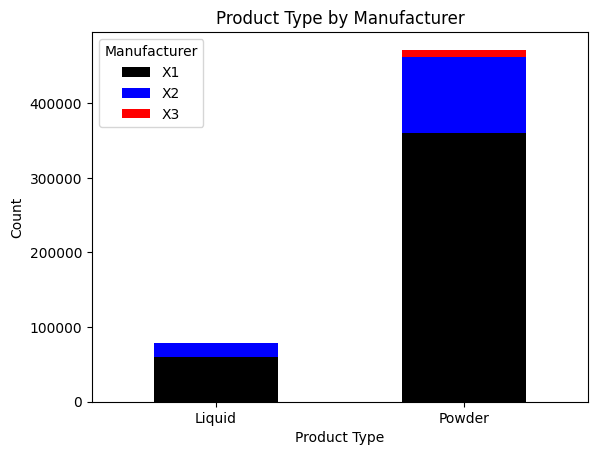

In [23]:
# Stacked bar plot
import matplotlib.pyplot as plt
product_type_counts = train.groupby(['Product Type', 'Manufacturer']).size().unstack(fill_value=0)
product_type_counts.plot(kind='bar', stacked=True, rot=0, title='Product Type by Manufacturer',color=['black', 'blue', 'red'])
plt.ylabel('Count')
plt.show()

The plot shows the count of products by their type and manufacturer, stacked on top of each other.

The x-axis of the plot represents the different manufacturers, and each manufacturer has a stacked bar. The different product types are represented by the different colored sections within each stacked bar.

The y-axis of the plot represents the count of products. The height of each stacked bar corresponds to the total number of products from a certain manufacturer, and the height of each colored section within the stacked bar corresponds to the number of products of a certain type from that manufacturer.

In the above plot, we can see that the product type 'powder' is supplied more than product type 'liquid'. All the three manufacturers are producing the product type 'powder' but only two manufacturers, X1 and X2, are producing the product type 'liquid'.



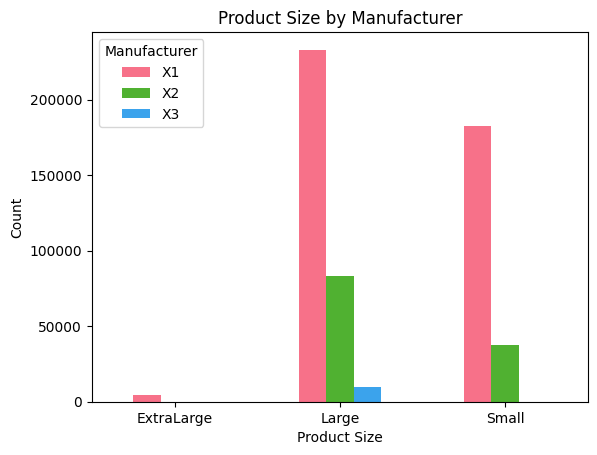

In [24]:
# Grouped bar plot
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette('husl', n_colors=len(product_type_counts.columns))

product_size_counts = train.groupby(['Product Size', 'Manufacturer']).size().unstack(fill_value=0)
product_size_counts.plot(kind='bar', rot=0, title='Product Size by Manufacturer', color=colors)
plt.ylabel('Count')
plt.show()

The plot is a bar chart that shows the count of products by their size and manufacturer.

The x-axis of the plot represents the different product sizes, and each product size has a group of bars. The different manufacturers are represented by the different colored bars within each group.

The y-axis of the plot represents the count of products. The height of each bar corresponds to the number of products of a certain size and from a certain manufacturer.

In the above plot, we can see that large products are produced in large quantity by all the three manufacturers, whereas small products are produced by only X1 and X2 manufacturers and extra large products are produced by only X1 manufacturer. 

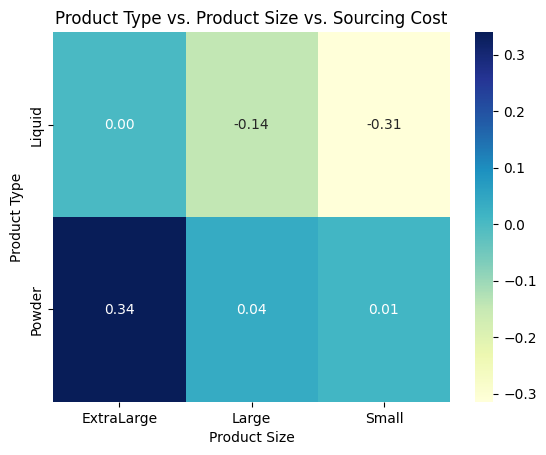

In [20]:
# Heat Map
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Scale the sourcing cost column
scaler = StandardScaler()
train['Sourcing Cost'] = scaler.fit_transform(train[['Sourcing Cost']])

# Create the heatmap
product_size_costs = train.groupby(['Product Type', 'Product Size'])['Sourcing Cost'].mean().unstack(fill_value=0)
sns.heatmap(product_size_costs, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Product Type vs. Product Size vs. Sourcing Cost')
plt.show()


The plot is a heatmap that shows the average sourcing cost for each combination of product type and product size and helps to visualize the relationship between product type, product size, and sourcing cost.

The x-axis of the plot represents the different product types, and the y-axis represents the different product sizes. Each cell in the heatmap corresponds to a combination of product type and product size, and the color of the cell represents the average sourcing cost for that combination.

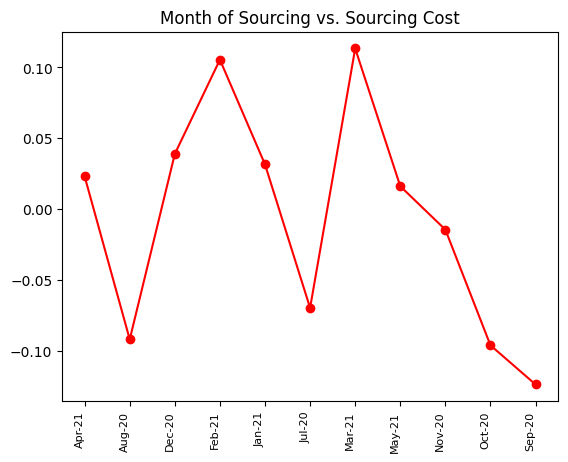

In [25]:
# Line plot
monthly_costs = train.groupby('Month of Sourcing')['Sourcing Cost'].mean()
plt.plot(monthly_costs.index, monthly_costs.values, marker='o', linestyle='-', color='red')
plt.title('Month of Sourcing vs. Sourcing Cost')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.show()

This plot shows the average sourcing cost for each month of sourcing in the dataset. The x-axis represents the months of sourcing, and the y-axis represents the average sourcing cost for each month. Each point on the plot corresponds to the average sourcing cost for a particular month, and the line connects these points to show the trend over time. The red color of the line and markers is used to highlight the data points. The title of the plot indicates that it shows the relationship between the month of sourcing and the sourcing cost. We can see that, in March 2021, the sourcing cost was highest and in Septemper 2020, it was the lowest.

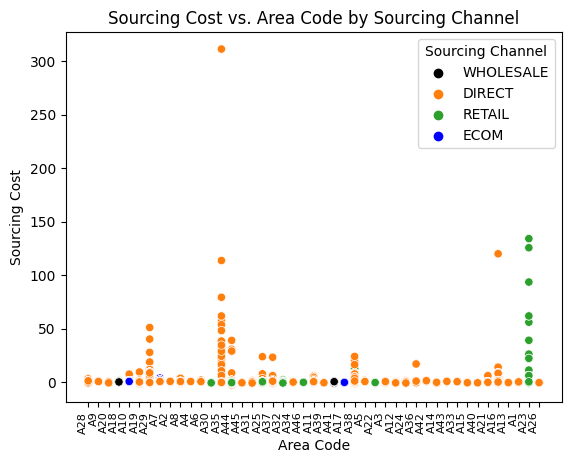

In [17]:
# Scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#000000', '#ff7f0e', '#2ca02c', '#0000FF']

sns.scatterplot(x='Area Code', y='Sourcing Cost', hue='Sourcing Channel', data=train, palette=colors, marker='o')
plt.title('Sourcing Cost vs. Area Code by Sourcing Channel')

# Rotate x-axis labels and adjust horizontal alignment
plt.xticks(rotation=90, ha='right', fontsize=8)

plt.legend(title='Sourcing Channel')
plt.show()


This graph is a scatter plot that shows the relationship between the sourcing cost and area code for different sourcing channels. Each dot on the plot represents a single data point, with the x-axis showing the area code and the y-axis showing the sourcing cost. The legend on the right side of the plot shows the mapping between the colors and the sourcing channels. The title of the plot indicates that it shows the sourcing cost versus the area code, with the sourcing channel as a categorical variable. We can see that the wholesale, retail and ecom sourcing channels are available for some particular areas only whereas direct sourcing channel is available in almost all areas.

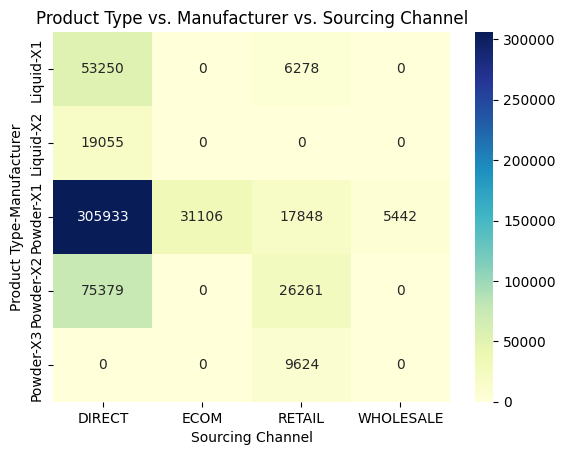

In [18]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

product_counts = train.groupby(['Product Type', 'Manufacturer', 'Sourcing Channel']).size().unstack(fill_value=0)
sns.heatmap(product_counts, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Product Type vs. Manufacturer vs. Sourcing Channel')
plt.show()


This plot is a heatmap that shows the count of products for each combination of product type, manufacturer, and sourcing channel. The x-axis represents the product types, the y-axis represents the manufacturers, and the different colors in the heatmap represent the different sourcing channels. We can see that X3 manufacturer doesn't supply liquid product type. X1 manufacturer supplies the most powder product type in direct sourcing channel as compared to others.

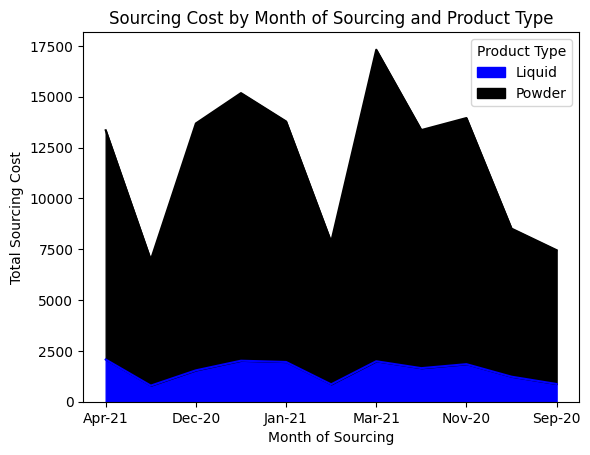

In [28]:
#Area plot
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with negative values in the 'Powder' column
monthly_costs = train[train['Sourcing Cost'] >= 0].groupby(['Month of Sourcing', 'Product Type'])['Sourcing Cost'].sum().reset_index()

# Pivot the filtered data to create separate columns for each product type
monthly_costs_pivot = monthly_costs.pivot_table(index='Month of Sourcing', columns='Product Type', values='Sourcing Cost', fill_value=0)

# Plot the stacked area plot
ax = monthly_costs_pivot.plot(kind='area', stacked=True, title='Sourcing Cost by Month of Sourcing and Product Type', color=['blue', 'black'])
ax.set_ylabel('Total Sourcing Cost')
ax.set_xlabel('Month of Sourcing')
plt.show()

The provided plot offers a comprehensive overview of the product distribution landscape, focusing on the interplay between product types, manufacturers, and sourcing channels. The x-axis represents the month of sourcing while the y-axis represents the total sourcing cost (the y-axis of the plot is labeled in 'le6', which signifies values in millions), and the different colors in the plot represent the different product types. The powder product type was supplied the most in the month of March 2021 and least in the month of August 2020 whereas the liquid product was supplied the most in the month of November 2020 and least in the month of September 2020.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


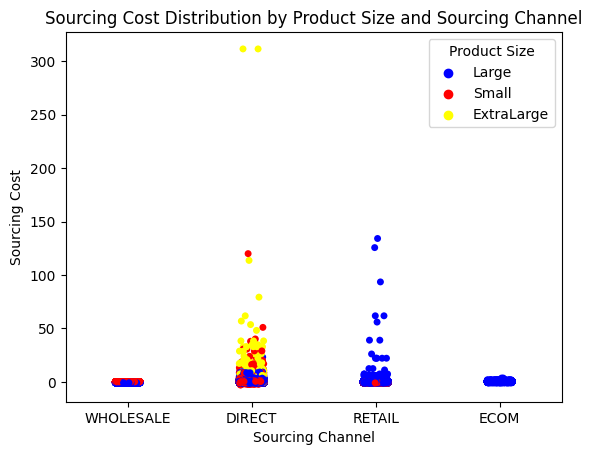

In [21]:
# Strip plot
sns.stripplot(x='Sourcing Channel', y='Sourcing Cost', hue='Product Size', data=train, palette=['blue','red','yellow'], jitter=True)
plt.title('Sourcing Cost Distribution by Product Size and Sourcing Channel')
plt.show()

This plot is a strip plot illustrating the distribution of sourcing costs across different product sizes and sourcing channels. Each dot on the plot represents a single data point, with the x-axis depicting the sourcing channel, the y-axis showing the sourcing cost, and the hue indicating the product size. The jitter parameter adds a small amount of random noise to the data points, helping to visualize overlapping points. We can see that the extralarge product size is only available in direct sourcing channel. Large and small product size are almost available in all sourcing channels.

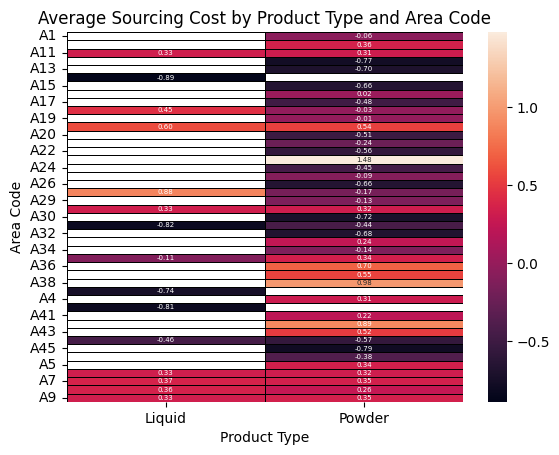

In [22]:
# Heatmap
# Calculate the average sourcing cost for each product type and manufacturer
avg_costs = train.groupby(['Product Type', 'Area Code'])['Sourcing Cost'].mean().reset_index()

# Pivot the data to create separate columns for each product type
avg_costs_pivot = avg_costs.pivot(index='Area Code', columns='Product Type', values='Sourcing Cost')

# Create a heatmap
sns.heatmap(avg_costs_pivot, annot=True, fmt='.2f', linewidths=.7, linecolor='black', annot_kws={"fontsize":5})

# Set the plot title, x-axis label, and y-axis label
plt.title('Average Sourcing Cost by Product Type and Area Code')
plt.xlabel('Product Type')
plt.ylabel('Area Code')

# Show the plot
plt.show()


This heatmap visualizes the average sourcing cost for each combination of product type and area code. Each cell in the heatmap represents the average sourcing cost for a specific product type within a particular area code. The color intensity of each cell indicates the magnitude of the average sourcing cost, with darker shades representing higher costs and lighter shades representing lower costs. The annotations within each cell display the average sourcing cost values rounded to two decimal places. The sourcing cost changes according to the product type and the area in which the product is supplied. The powder product type is supplied in almost every area but liquid product type has limited suppling.

# Test

In [29]:
# Printing the test dataset
test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [30]:
# Shape of test dataset
test.shape

(96, 8)

In [31]:
# Description of the dataset
test.describe()

,Sourcing Cost
count,96.000000
mean,106.208021
std,52.359484
min,4.140000
25%,59.662500
50%,117.245000
75%,144.915000
max,234.710000


In [32]:
# Information about the dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.1+ KB


In [33]:
# Checking for null values
test.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [34]:
# Column names
test.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

# Function

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_dataframe(dataframe):
    # Handle missing values
    dataframe = dataframe.dropna() # Remove rows with missing values

    # Convert categorical variables to numerical variables using LabelEncoding
    label_encoder = LabelEncoder()
    categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
    for col in categorical_cols:
        dataframe[col] = label_encoder.fit_transform(dataframe[col])

    # Scale numerical variables using StandardScaler
    numerical_cols = ['Sourcing Cost']
    data_scaler = StandardScaler()
    dataframe[numerical_cols] = data_scaler.fit_transform(dataframe[numerical_cols])

    # Return the preprocessed DataFrame
    return dataframe

In [36]:
# Preprocess the datasets using the modified preprocess_dataframe() function
train_data = preprocess_dataframe(train)
test_data = preprocess_dataframe(test)

In [37]:
# Assume that 'target_column' is the column you want to predict
# and 'feature_columns' are the columns you want to use for prediction
target_column = 'Sourcing Cost'
feature_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']

## Decision Tree

Decision Tree is a non-parametric supervised learning algorithm used for classification and regression tasks.
It partitions the feature space into segments based on the most significant attributes, resulting in a tree-like structure of decision nodes and leaf nodes.
Decision Tree models are interpretable and easy to visualize, making them suitable for understanding feature importance and decision-making processes.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create a decision tree regressor and fit it to the training data
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Use the trained regressor to make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', dt_mse)
print('Mean Absolute Error:', dt_mae)
print('R-squared:', dt_r2)


Mean Squared Error: 0.5270815796537057
Mean Absolute Error: 0.5542450323047031
R-squared: 0.4729184203462943


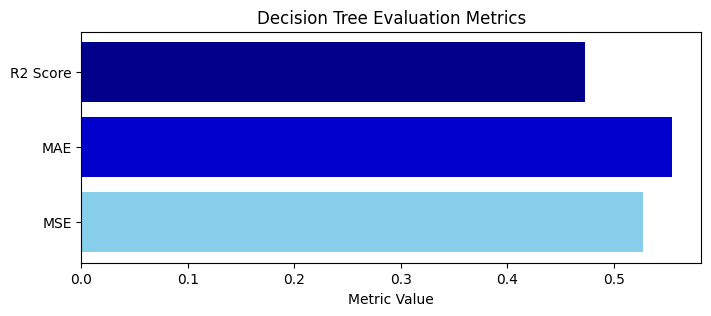

In [109]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [dt_mse, dt_mae, dt_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('Decision Tree Evaluation Metrics')

plt.show()


## Random Forest

Random Forest is an ensemble learning technique that constructs multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting.
It introduces randomness in the tree-building process by using random subsets of features and bootstrap sampling.
Random Forest is robust, scalable, and capable of handling high-dimensional data, making it a popular choice for classification and regression tasks.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create a random forest regressor and fit it to the training data
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Use the trained regressor to make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', rf_mse)
print('Mean Absolute Error:', rf_mae)
print('R-squared:', rf_r2)


Mean Squared Error: 0.5260191894570371
Mean Absolute Error: 0.5528512069313233
R-squared: 0.4739808105429629


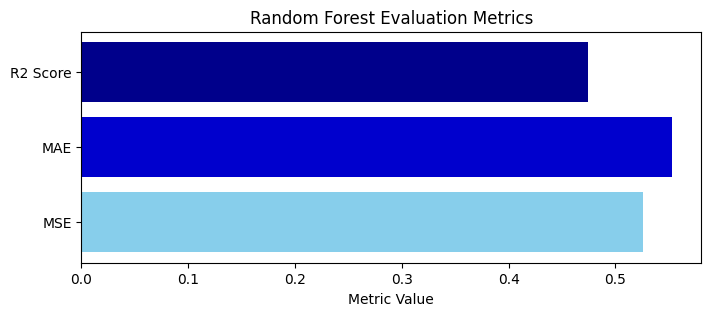

In [108]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [rf_mse, rf_mae, rf_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('Random Forest Evaluation Metrics')

plt.show()


## XGBoost  (Extreme Gradient Boosting)

XGBoost is a scalable and efficient implementation of gradient boosting, an ensemble learning technique that builds additive models in a forward stage-wise manner.
It sequentially trains weak learners (typically decision trees) and optimizes a loss function to minimize errors.
XGBoost is highly customizable, offering fine-grained control over model parameters and regularization techniques, resulting in superior performance across a wide range of machine learning tasks.

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Split the data into features and target variable
X_train = train_data.drop('Sourcing Cost', axis=1)
y_train = train_data['Sourcing Cost']
X_test = test_data.drop('Sourcing Cost', axis=1)
y_test = test_data['Sourcing Cost']

# Define the XGBoost parameters
params = {
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror'
}

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the performance of the model
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', xgb_mse)
print('Mean Absolute Error:', xgb_mae)
print('R-squared:', xgb_r2)

Mean Squared Error: 0.6621165723119546
Mean Absolute Error: 0.6837423771702045
R-squared: 0.33788342768804536


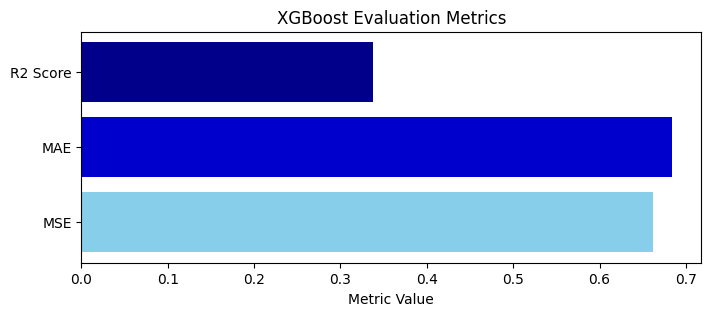

In [110]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [xgb_mse, xgb_mae, xgb_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('XGBoost Evaluation Metrics')

plt.show()

## AdaBoost

AdaBoost is an ensemble learning technique that combines multiple weak learners (e.g., decision trees) to create a strong classifier.
It sequentially trains multiple models, with each subsequent model focusing on the errors made by its predecessors, thereby improving overall accuracy.
AdaBoost is particularly effective in handling binary classification problems and is less prone to overfitting.

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create an AdaBoost regressor and fit it to the training data
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Use the trained regressor to make predictions on the test data
y_pred = adaboost.predict(X_test)

# Evaluate the performance of the regressor using various metrics
ada_mse = mean_squared_error(y_test, y_pred)
ada_mae = mean_absolute_error(y_test, y_pred)
ada_r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', ada_mse)
print('Mean Absolute Error:', ada_mae)
print('R-squared Score:', ada_r2)

Mean Squared Error: 0.7735679675771099
Mean Absolute Error: 0.7235887391289819
R-squared Score: 0.22643203242289012


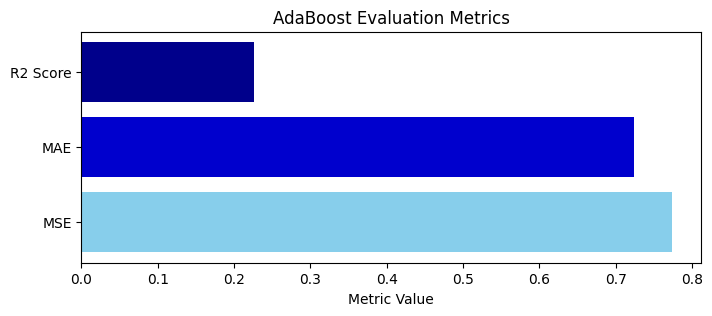

In [111]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [ada_mse, ada_mae, ada_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('AdaBoost Evaluation Metrics')

plt.show()

## Linear Regression

Linear Regression is a fundamental statistical technique used for modeling the relationship between a dependent variable and one or more independent variables.
It assumes a linear relationship between the predictor variables and the target variable, aiming to minimize the sum of squared residuals.
Linear Regression is interpretable and computationally efficient, making it suitable for analyzing relationships and making predictions in simple linear scenarios.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create a linear regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model using various metrics
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', lr_mse)
print('Mean Absolute Error:', lr_mae)
print('R-squared Score:', lr_r2)

Mean Squared Error: 0.8121723147581013
Mean Absolute Error: 0.7410534715018576
R-squared Score: 0.18782768524189875


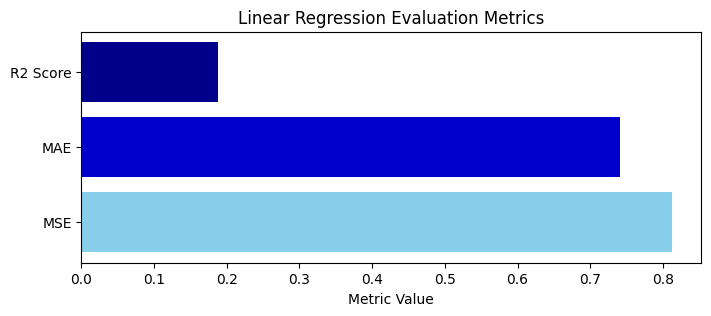

In [112]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [lr_mse, lr_mae, lr_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('Linear Regression Evaluation Metrics')

plt.show()

## K-Nearest Neighbors (KNN)


K-Nearest Neighbors is a simple and intuitive algorithm used for classification and regression tasks.
It classifies or predicts the target variable by finding the majority class or averaging the values of the nearest neighbors in the feature space.
KNN is non-parametric and instance-based, meaning it does not make assumptions about the underlying data distribution.

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create a KNN regressor and fit it to the training data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the trained regressor to make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the performance of the regressor using various metrics
knn_mse = mean_squared_error(y_test, y_pred)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', knn_mse)
print('Mean Absolute Error:', knn_mae)
print('R-squared Score:', knn_r2)


Mean Squared Error: 0.528640044486422
Mean Absolute Error: 0.5585156899385376
R-squared Score: 0.471359955513578


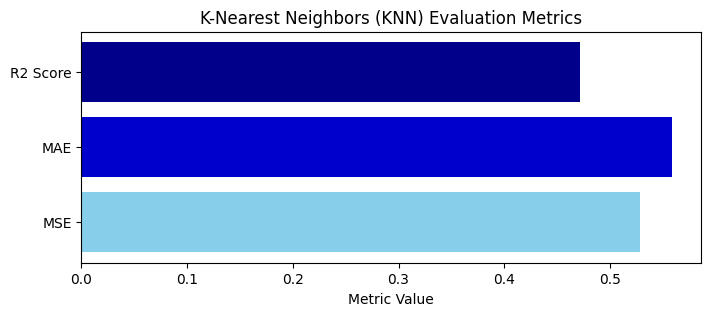

In [116]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [knn_mse, knn_mae, knn_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('K-Nearest Neighbors (KNN) Evaluation Metrics')

plt.show()

## Extra Tree Regressor

Extra Tree Regression, also known as Extremely Randomized Trees, is an ensemble learning technique similar to Random Forest.
It constructs multiple decision trees using random subsets of features and random thresholds for splitting, resulting in an ensemble of highly randomized trees.
Extra Tree Regression can reduce overfitting and variance while maintaining predictive accuracy, especially in high-dimensional datasets.

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = train_data[feature_columns]
y_train = train_data[target_column]

X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create an Extra Trees Regressor and fit it to the training data
regressor = ExtraTreesRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Use the trained regressor to make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the performance of the regressor using various metrics
etr_mse = mean_squared_error(y_test, y_pred)
etr_mae = mean_absolute_error(y_test, y_pred)
etr_r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', etr_mse)
print('Mean Absolute Error:', etr_mae)
print('R-squared Score:', etr_r2)


Mean Squared Error: 0.5424584310505468
Mean Absolute Error: 0.5660934016295491
R-squared Score: 0.4575415689494532


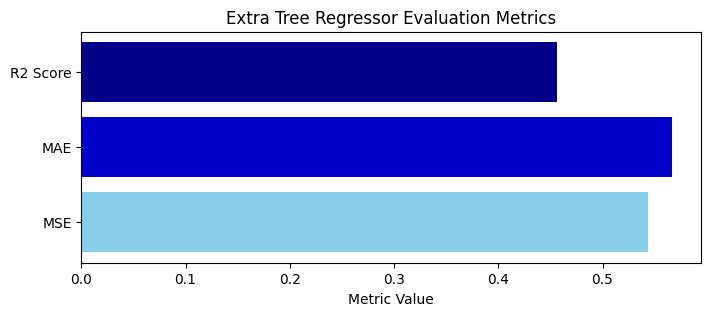

In [117]:
categories = ['MSE', 'MAE', 'R2 Score']
metrics = [etr_mse, etr_mae, etr_r2]
colors = ['#87CEEB', '#0000CD', '#00008B']

plt.figure(figsize=(8,3))

x = np.arange(len(categories))
width = 0.8

plt.barh(x, metrics, width, color=colors)
plt.yticks(x, categories)
plt.xlabel('Metric Value')
plt.title('Extra Tree Regressor Evaluation Metrics')

plt.show()

# Results comparison 

In [46]:
model_metrics = {
    'Decision Tree': {'MSE': dt_mse, 'MAE': dt_mae, 'R2': dt_r2},
    'Random Forest': {'MSE': rf_mse, 'MAE': rf_mae, 'R2': rf_r2},
    'XGBoost': {'MSE': xgb_mse, 'MAE': xgb_mae, 'R2': xgb_r2},
    'AdaBoost': {'MSE': ada_mse, 'MAE': ada_mae, 'R2': ada_r2},
    'Linear Regression': {'MSE': lr_mse, 'MAE': lr_mae, 'R2': lr_r2},
    'KNN': {'MSE': knn_mse, 'MAE': knn_mae, 'R2': knn_r2},
    'Extra Tree Regression': {'MSE': etr_mse, 'MAE': etr_mae, 'R2': etr_r2}
}

In [47]:
metrics_df = pd.DataFrame(model_metrics).T

In [48]:
metrics_df

,MSE,MAE,R2
Decision Tree,0.527082,0.554245,0.472918
Random Forest,0.526019,0.552851,0.473981
XGBoost,0.662117,0.683742,0.337883
AdaBoost,0.773568,0.723589,0.226432
Linear Regression,0.812172,0.741053,0.187828
KNN,0.528640,0.558516,0.471360
Extra Tree Regression,0.542458,0.566093,0.457542


**Mean Absolute Error (MAE):**
MAE is a metric used to measure the average magnitude of errors in a set of predictions, without considering their direction. It is calculated as the average of the absolute differences between the predicted values and the actual values.

Formula: MAE = (1 / n) * Σ |y_true - y_pred|

**Mean Squared Error (MSE):**
MSE is a metric used to measure the average squared differences between the predicted values and the actual values. It gives higher weights to larger errors compared to smaller ones.

Formula: MSE = (1 / n) * Σ (y_true - y_pred)^2

**R2 Score (Coefficient of Determination):**
R2 Score is a statistical measure that represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). It indicates how well the regression model fits the observed data.
R2 Score ranges from 0 to 1, where 0 indicates that the model does not explain any variance in the target variable, and 1 indicates a perfect fit.

Formula: R2 = 1 - (SS_res / SS_tot),
where SS_res is the sum of squared residuals (errors) and SS_tot is the total sum of squares.

In [49]:
metrics_df1 = pd.DataFrame(model_metrics).T.reset_index()
metrics_df1 = pd.melt(metrics_df1, id_vars='index', var_name='Metric', value_name='Value')
metrics_df1.columns = ['Model', 'Metric', 'Value']

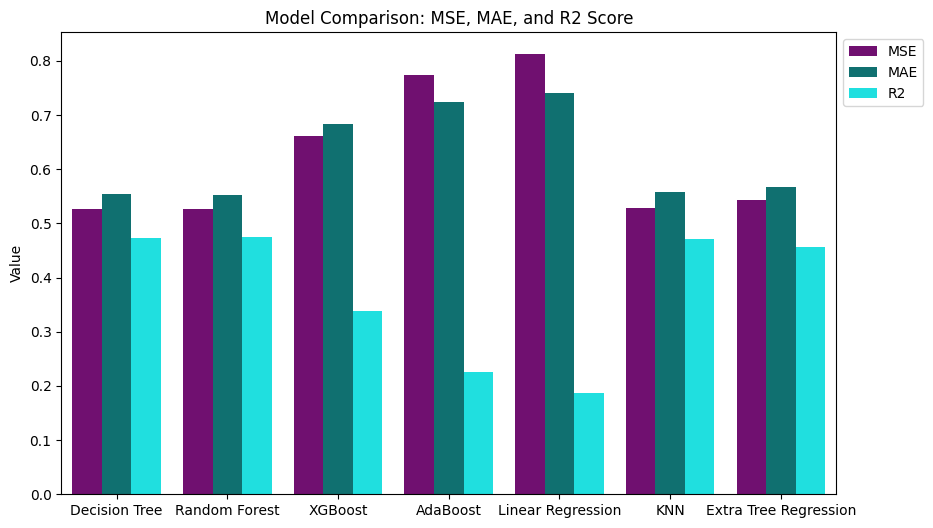

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = ['#800080', '#008080', '#00FFFF']
plt.figure(figsize=(10, 6))
sns_plot = sns.barplot(data=metrics_df1, x='Model', y='Value', hue='Metric', palette=custom_palette)

# Set plot title and labels
plt.title('Model Comparison: MSE, MAE, and R2 Score')
plt.xlabel('')
plt.ylabel('Value')

# Add legend
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.show()

This graph illustrates a comparison of multiple machine learning models based on different evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 Score. Each model is represented on the x-axis, while the y-axis displays the corresponding values of the evaluation metrics. 

In [50]:
metrics_df2 = metrics_df1.pivot_table(index='Model', columns='Metric', values='Value')

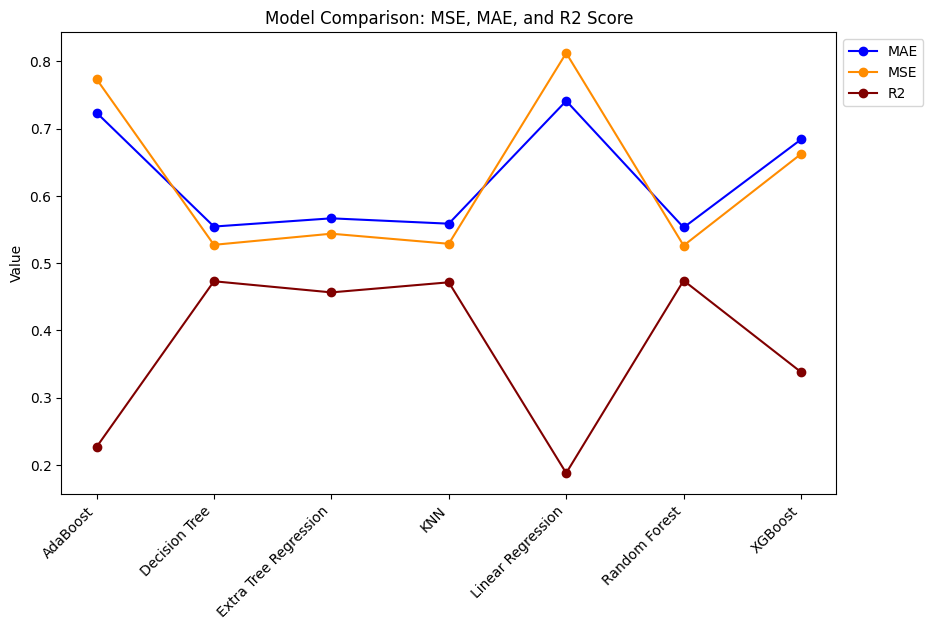

In [102]:
import matplotlib.pyplot as plt

custom_palette = ['#0000FF', '#FF8C00', '#800000']
plt.figure(figsize=(10, 6))

# Plot the lines
for i, metric in enumerate(metrics_df2.columns):
    plt.plot(metrics_df2.index, metrics_df2[metric], marker='o', linestyle='-', color=custom_palette[i], label=metric)

# Set plot title and labels
plt.title('Model Comparison: MSE, MAE, and R2 Score')
plt.xlabel('')
plt.ylabel('Value')

# Rotate x-axis labels and adjust horizontal alignment
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.show()


This graph presents a comparison of multiple machine learning models across different evaluation metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 Score. Each line on the plot corresponds to a specific evaluation metric, with markers indicating the values of the metric for each model. The x-axis represents the models being compared, while the y-axis displays the corresponding values of the evaluation metrics. The lines are color-coded using a custom palette, with each color representing a different evaluation metric.

## Conclusion 

In this analysis, seven distinct machine learning models — AdaBoost, Decision Tree, Extra Tree Regression, K-Nearest Neighbors (KNN), Linear Regression, Random Forest, and XGBoost — were utilized. Based on the analysis of the two plots and the metrics table (metric_df), it is evident that among the seven machine learning models utilized for predicting the sourcing cost, Random Forest emerges as the most effective performer. Following closely behind is the Decision Tree model, which ranks as the second-best performer, while K-Nearest Neighbors (KNN) takes the third position in terms of predictive accuracy. Conversely, Linear Regression appears to exhibit the least favorable performance among the seven models considered. These observations are based on the evaluation metrics of Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2 Score, which collectively provide insight into the predictive capability and overall performance of each model.

In [54]:
# Downloading the results
metrics_df2.to_csv('Output.csv', index=True)